## Desafío 1: Determinantes del ingreso

Usted trabaja para un organismo no gubernamental que está interesado en las dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza extrema, enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa de las Naciones Unidas para el Desarrollo.

Le encomiendan el desarrollo de un modelo predictivo sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en base a una serie de atributos sociodemográficos.

In [376]:
# Para esta primera instancia vamos a preparar los datos y recodificarlos para que nuestra base de datos nos de 
# mejores resultados en nuestra etapa de modelación. 
# El modelo buscará predecir si el 'income' del trabajador será mayor o menor a 50k en base a sus atributos.

# Se utilizarán métricas como coef_, Mean Squared Error (MSE) y R2 de la librería metrics de ScikitLearn 
# para determinar el desempeño del modelo propuesto.

#### HITO 1 : PRELIMINARES

Elementos a considerar en éste hito:
- Los dos enunciados deben estar claros, considerando el tipo de problema a resolver (regresión o clasificación).Para cada uno de los enunciados y su problema identificado, se debe justificar el uso de métricas para medir el desempeño del problema. (6 puntos)
- Se debe considerar el uso de las librerías asociadas para la ingesta, preprocesamiento, visualización y modelación, así como métricas de evaluación. (2 puntos)
- Se debe detallar y considerar el proceso de preprocesamiento y recodificación de datos. (2 puntos)

In [24]:
# Librerías ingesta de datos
import pandas as pd
import numpy as np

# Librerías visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías preprocesamiento y modelado
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import missingno as msngo

# Librerías otros
import warnings
import Funciones as fx

# Ignorar advertencias para mantener el notebook limpio
warnings.filterwarnings('ignore')
# Parámetros visuales de los gráficos
plt.rcParams['figure.figsize'] = (15, 10)
sns.color_palette("pastel")

# Lectura de base da datos (csv)
df = pd.read_csv('CSV/income-db.csv')

In [25]:
# Revisión visual de la data
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [26]:
# Copia del df original
df_recod = df.copy()

In [27]:
# Recodificar datos ['occupation']
# Preparar listas para recod
categorias = [('Prof-specialty','Exec-managerial','Adm-clerical','Sales','Tech-support'),
        ('Craft-repair','Machine-op-inspct','Transport-moving','Handlers-cleaners','Farming-fishing','Protective-serv','Priv-house-serv'),
        ('Other-service','Armed-Forces')]
collar_list = [('white-collar'),('blue-collar'),('others')]

# Recod ['occupation']
fx.recodificar_data(df_recod, 'occupation', categorias, collar_list)
fx.rename_column(df_recod, 'occupation', 'collars')

In [28]:
# Recodificar datos ['workclass']
# Preparar listas para recod
categorias = [('Federal-gov'),
        ('State-gov','Local-gov'),
        ('Self-emp-inc','Self-emp-not-inc'),
        ('Never-worked','Without-pay'),
        ('Private')]
jobs = [('federal-gov'),('state-level-gov'),('self-employed'),('unemployed'),('private')]

# Recod ['workclass_recod']
fx.recodificar_data(df_recod, 'workclass', categorias, jobs)
fx.rename_column(df_recod, 'workclass','workclass_recod')

In [29]:
# Recodificar datos ['education']
# Preparar listas para recod
categorias = [('Preschool'),
        ('1st-4th','5th-6th'),
        ('7th-8th','9th','10th','11th','12th','HS-grad'),
        ('Assoc-voc','Assoc-acdm','Some-college'),
        ('Bachelors','Masters','Prof-school','Doctorate')]
grades = [('preschool'),('elementary-school'),('high-school'),('college'),('university')]

# Recod ['educ_recod']
fx.recodificar_data(df_recod, 'education', categorias, grades)
fx.rename_column(df_recod, 'education', 'educ_recod')

In [30]:
# Recodificar datos ['marital-status'] 
# Preparar listas para recod
categorias = [('Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'),
        ('Divorced'),
        ('Separated'),
        ('Widowed'),
        ('Never-married')]
status = [('married'),('divorced'),('separated'),('widowed'),('single')]

# Recod ['civstatus']
fx.recodificar_data(df_recod, 'marital-status', categorias, grades)
fx.rename_column(df_recod, 'marital-status', 'civstatus')

In [31]:
# Recodificar datos ['native-country']
# Preparar listas para recod
categorias = [('United-States','Canada','Jamaica','Cuba','Mexico','Outlying-US(Guam-USVI-etc)','Dominican-Republic','Haiti','Puerto-Rico'),
        ('Guatemala','El-Salvador','Nicaragua','Honduras'),
        ('Columbia','Peru','Ecuador','Trinadad&Tobago'),
        ('Ireland', 'Germany', 'England','Scotland','Greece','France','Holand-Netherlands','Hungary','Italy',
        'Poland','Portugal','Yugoslavia'),
        ('Philippines','Thailand','Vietnam','Japan','India','Cambodia','Laos','Taiwan','China','Iran','Hong','South')]
regions = [('northamerica'),('centralamerica'),('southamerica'),('europe'),('asia')]

# Recod ['region']
fx.recodificar_data(df_recod, 'native-country', categorias, regions)
fx.rename_column(df_recod, 'native-country', 'region')

In [32]:
# Recodificar datos ['income']

# Recod ['income']
df_recod['income'] = df_recod['income'].replace(['<=50K','>50K'],[0,1])

In [377]:
# Luego de recodificar los datos, se revisará los valores del dataframe y se visualizarán los datos en gráficos para 
# tener una mejor comprensión de los datos.

In [33]:
df_recod.head()

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,collars,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region,income
0,25,private,226802,high-school,7,university,blue-collar,Own-child,Black,Male,0,0,40,northamerica,0
1,38,private,89814,high-school,9,preschool,blue-collar,Husband,White,Male,0,0,50,northamerica,0
2,28,state-level-gov,336951,college,12,preschool,blue-collar,Husband,White,Male,0,0,40,northamerica,1
3,44,private,160323,college,10,preschool,blue-collar,Husband,Black,Male,7688,0,40,northamerica,1
4,18,?,103497,college,10,university,?,Own-child,White,Female,0,0,30,northamerica,0


#### HITO 2 : DESCRIPCIÓN
Elementos a considerar en éste hito:
   - La inspección visual del vector objetivo. (4 puntos)
   - La inspección visual de las variables. (4 puntos)
   - La inspección de datos perdidos en las variables. (2 puntos)
   - De ser necesario, se puede iterar en el proceso de preprocesamiento y recodificación de las variables.

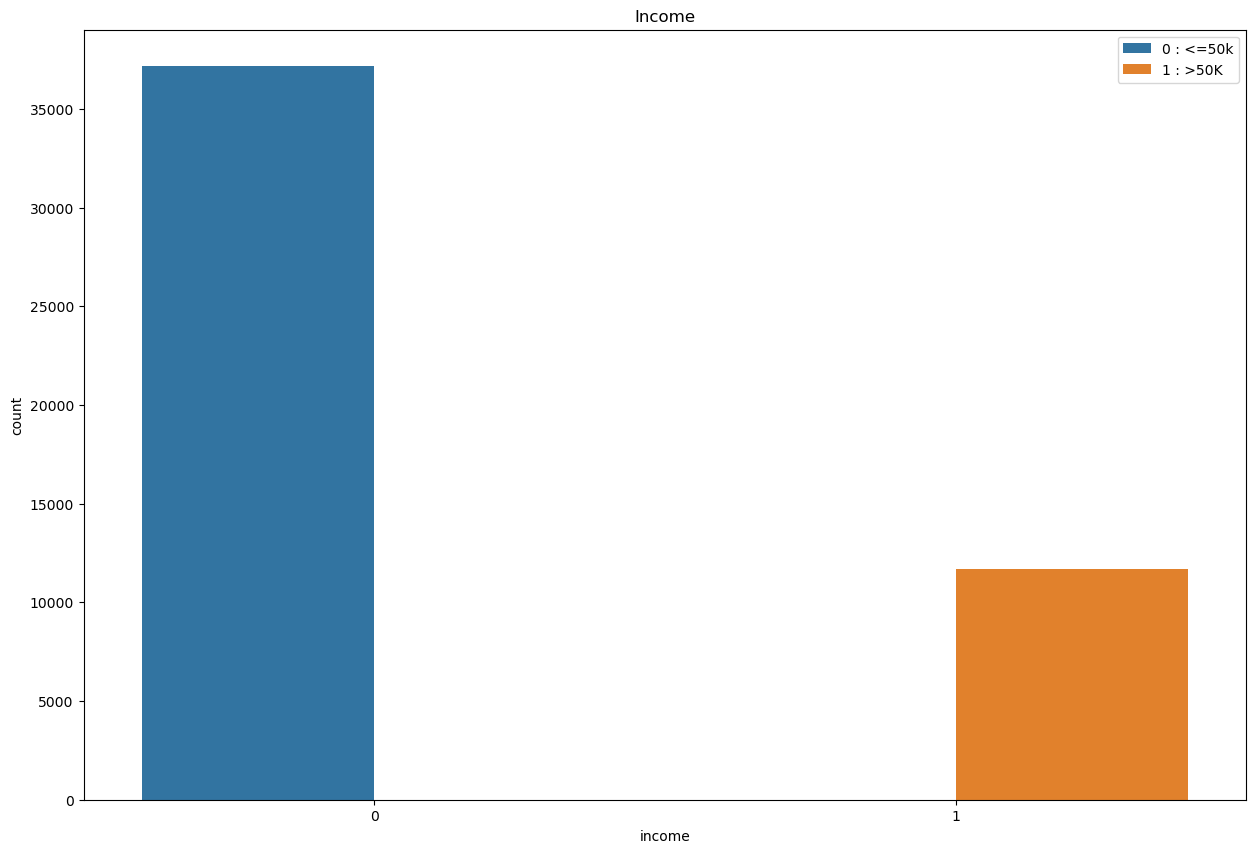

In [34]:
sns.countplot(data=df_recod, x='income', hue='income')
plt.title('Income')
plt.legend(labels=['0 : <=50k','1 : >50K'])

In [35]:
df_recod['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [36]:
df_recod.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [37]:
# Revisión visual de la data recod
variables_recod = ['educ_recod','civstatus','collars','region','workclass_recod']
df_recod[variables_recod].describe()

,educ_recod,civstatus,collars,region,workclass_recod
count,48842,48842,48842,48842,48842
unique,5,5,4,6,6
top,high-school,preschool,white-collar,northamerica,private
freq,21353,23044,24819,45594,33906


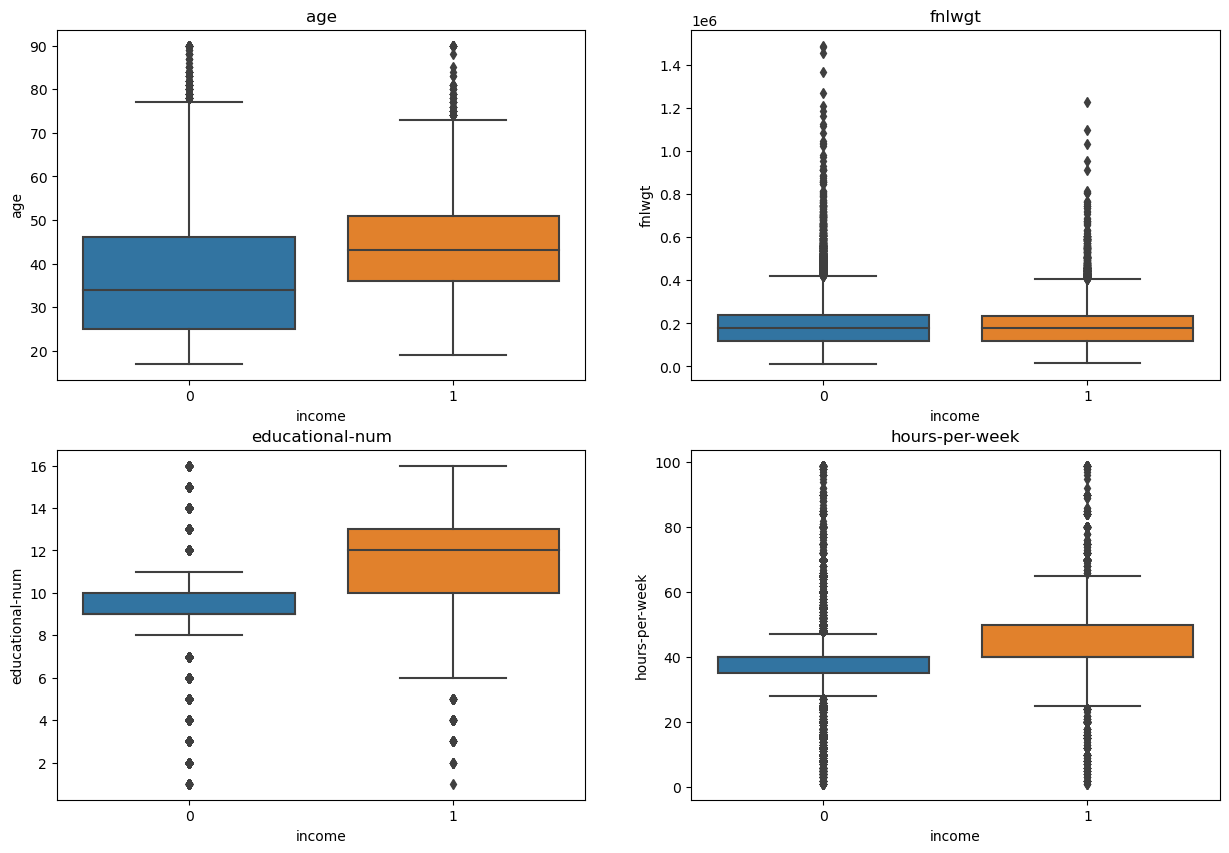

In [38]:
# Mostrar gráficos
variables_df = ['age','fnlwgt','educational-num','hours-per-week']
for index, variable in enumerate(variables_df):
    plt.subplot(2,2,index+1)
    sns.boxplot(y=df_recod[variable], x=df_recod['income'])
    plt.title(variable)

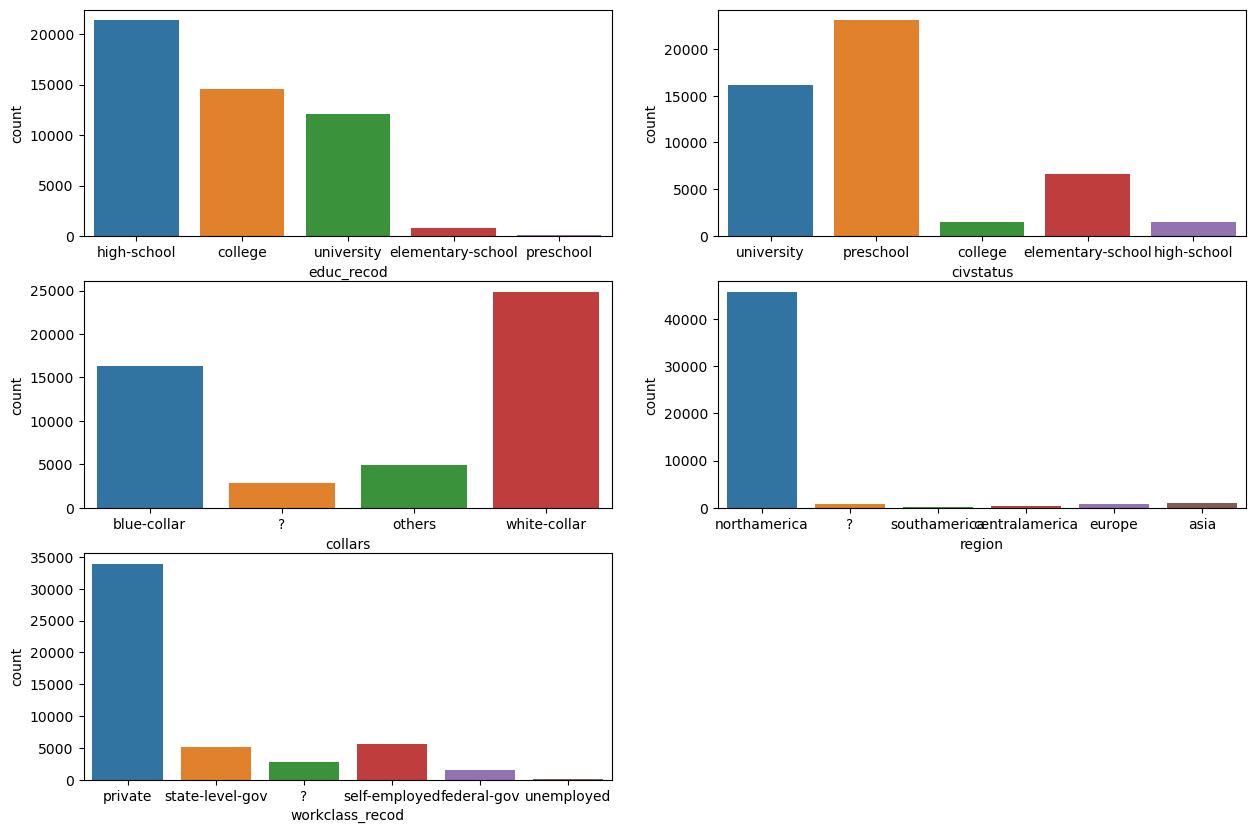

In [39]:
# Mostrar gráficos
for index, variable in enumerate(variables_recod):
    plt.subplot(3,2,index+1)
    sns.countplot(df_recod[variable])

<AxesSubplot:>

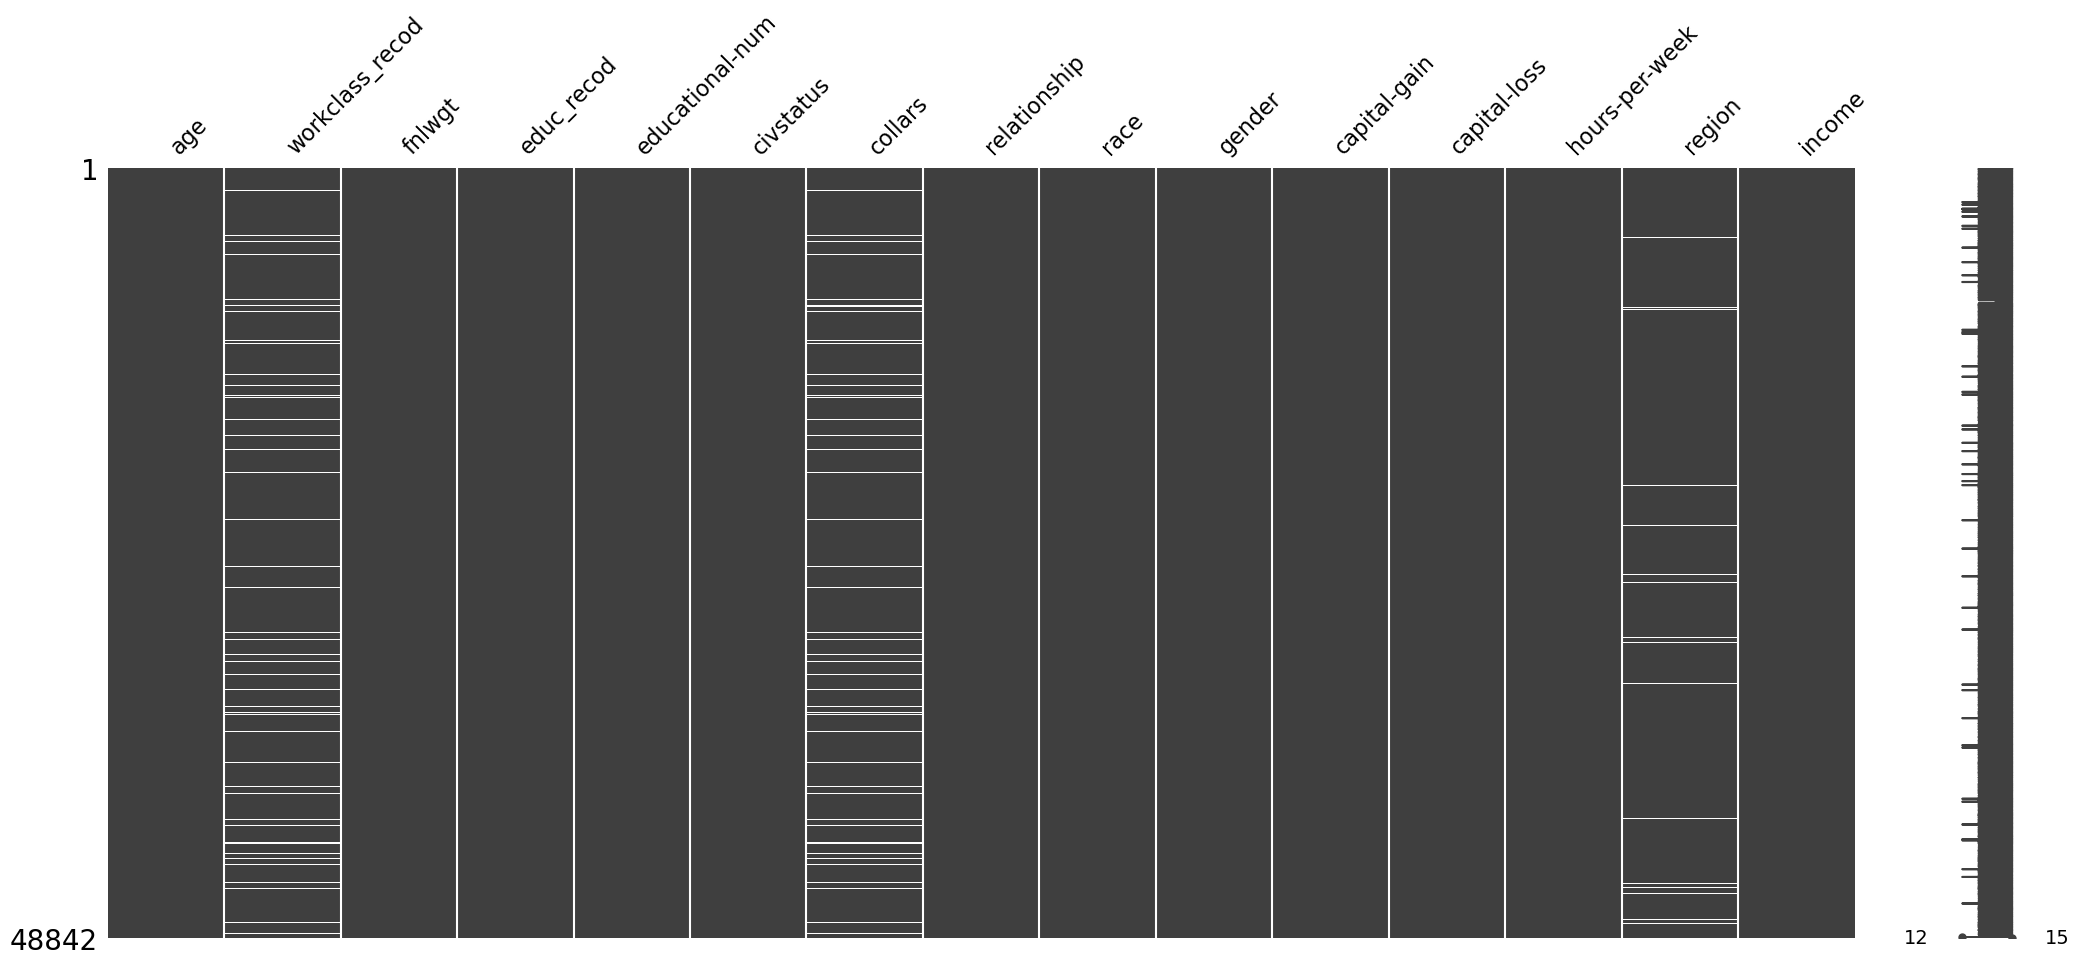

In [40]:
# Revisión de valores ?
msngo.matrix(df_recod.replace(['?'], [np.nan]))

<AxesSubplot:>

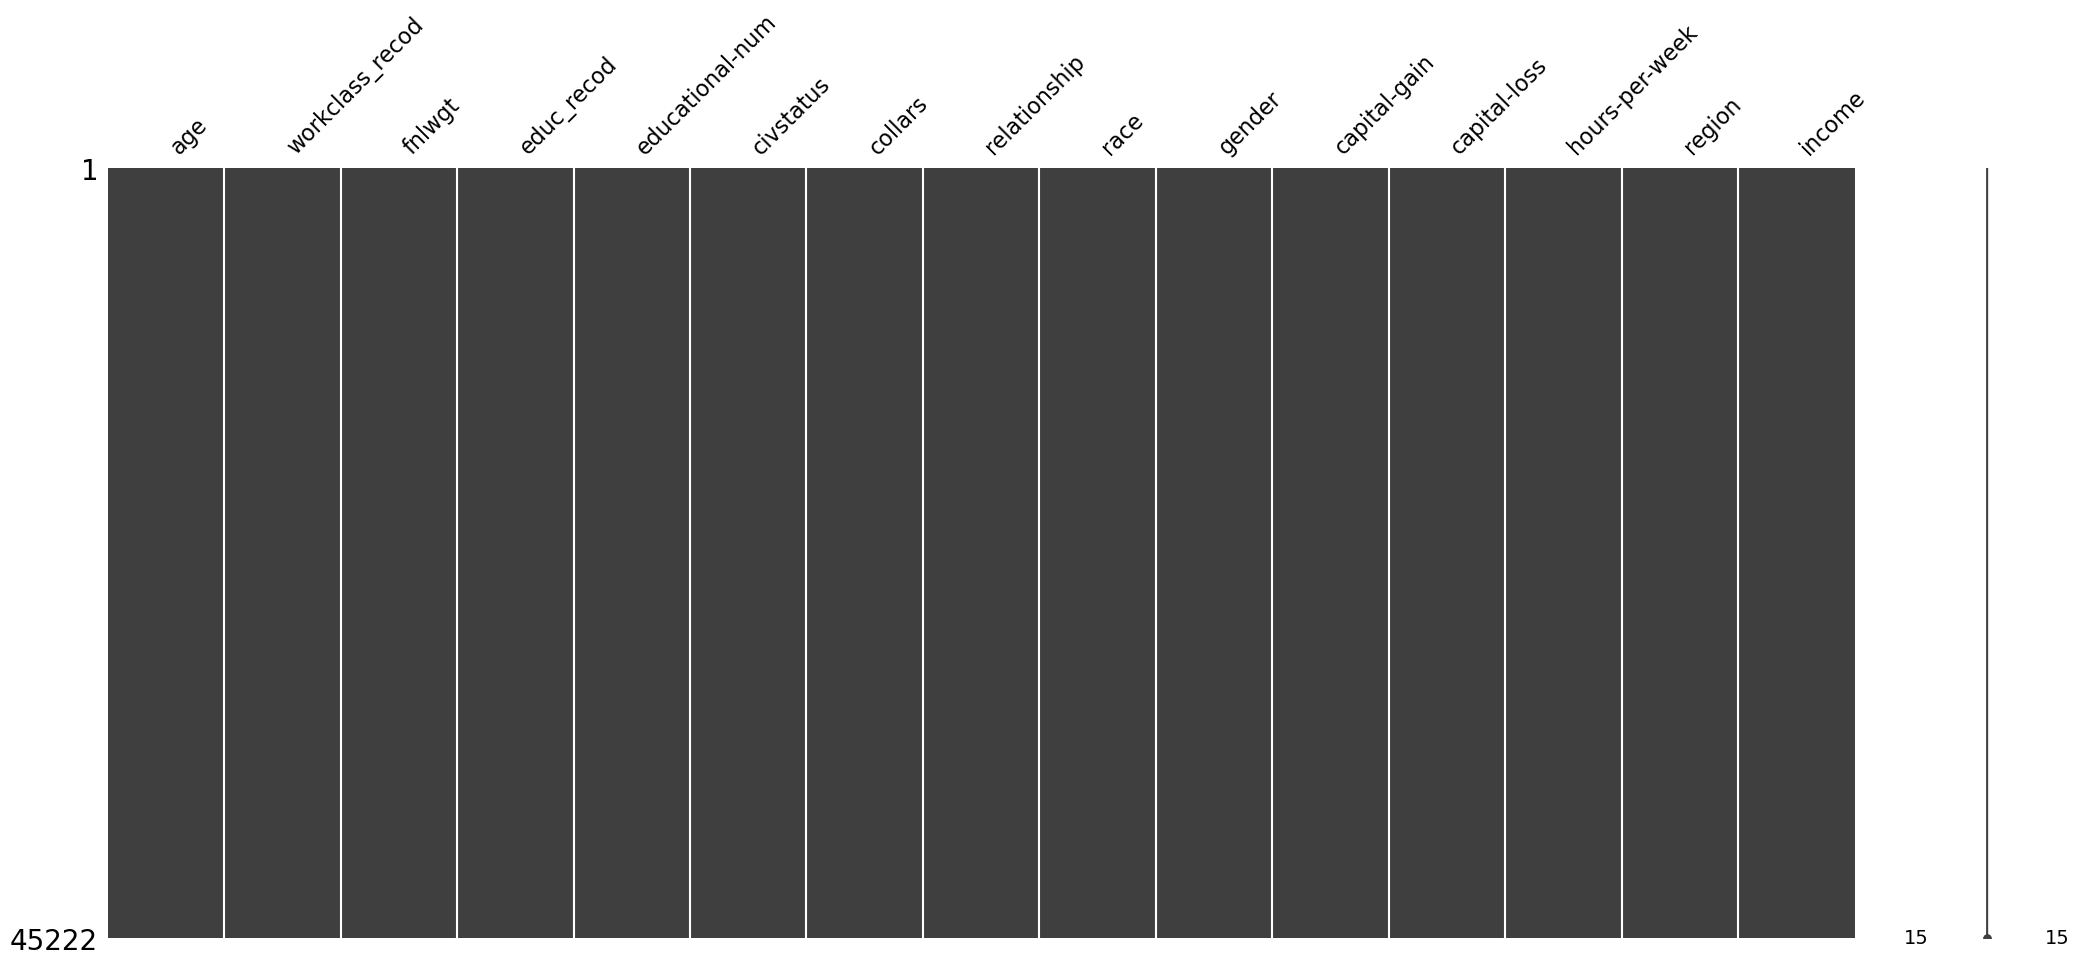

In [41]:
# Eliminación de datos ?, según la revisión anterior y los gráficos nos confirman la presencia de datos NaN
df_recod = df_recod.replace(['?'], [np.nan])
df_drop = df_recod.dropna()
msngo.matrix(df_drop)

<AxesSubplot:>

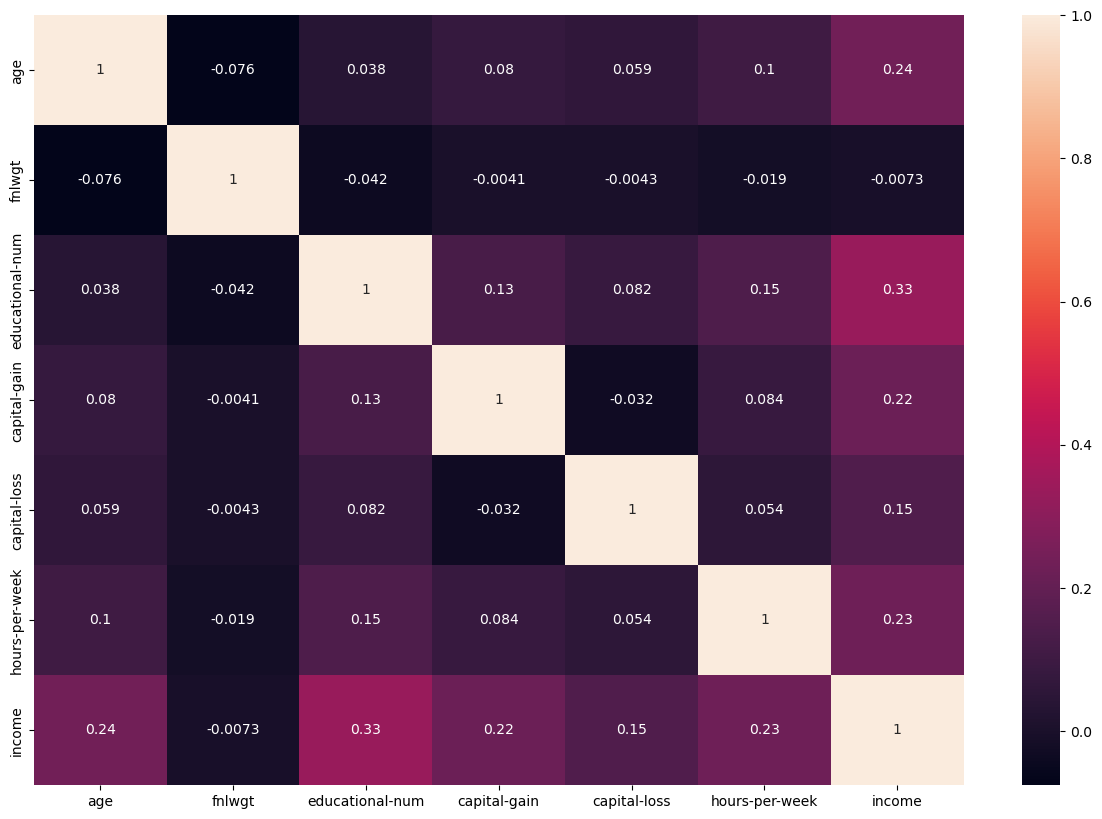

In [42]:
# Revisión de mapa de correlaciones
sns.heatmap(df_drop.corr(), annot=True)

In [378]:
# No se observan todas las variables del dataframe por lo que se recodificarán las variables faltantes en dummies 
# para que sean consideradas en los próximos modelos.

In [43]:
# Se generará un DataFrame con los valores dummies.
df_dummies = pd.get_dummies(df_drop, columns=variables_recod, drop_first=True)
df_dummies

,age,fnlwgt,educational-num,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income,...,collars_others,collars_white-collar,region_centralamerica,region_europe,region_northamerica,region_southamerica,workclass_recod_private,workclass_recod_self-employed,workclass_recod_state-level-gov,workclass_recod_unemployed
0,25,226802,7,Own-child,Black,Male,0,0,40,0,...,0,0,0,0,1,0,1,0,0,0
1,38,89814,9,Husband,White,Male,0,0,50,0,...,0,0,0,0,1,0,1,0,0,0
2,28,336951,12,Husband,White,Male,0,0,40,1,...,0,0,0,0,1,0,0,0,1,0
3,44,160323,10,Husband,Black,Male,7688,0,40,1,...,0,0,0,0,1,0,1,0,0,0
5,34,198693,6,Not-in-family,White,Male,0,0,30,0,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Wife,White,Female,0,0,38,0,...,0,1,0,0,1,0,1,0,0,0
48838,40,154374,9,Husband,White,Male,0,0,40,1,...,0,0,0,0,1,0,1,0,0,0
48839,58,151910,9,Unmarried,White,Female,0,0,40,0,...,0,1,0,0,1,0,1,0,0,0
48840,22,201490,9,Own-child,White,Male,0,0,20,0,...,0,1,0,0,1,0,1,0,0,0


### HITO 3 : MODELACIÓN DESCRIPTIVA

Elementos a considerar
   - La modelación mediante regresión de ambos problemas. (4 puntos)
   - La interpretación de los principales regresores en cada problema. (4 puntos)
   - La definición de las estrategias de Modelación predictiva. (2 puntos)   

In [44]:
# string con columnas. Cambié el nombre de las columnas para que no generara conflicto al momento de llevarlas al modelo.

fx.rename_column(df_dummies, 'educational-num', 'educational_num')
fx.rename_column(df_dummies, 'capital-gain', 'capital_gain')
fx.rename_column(df_dummies, 'capital-loss', 'capital_loss')
fx.rename_column(df_dummies, 'hours-per-week', 'hours_per_week')
fx.rename_column(df_dummies, 'educ_recod_elementary-school', 'educ_recod_elementary_school')
fx.rename_column(df_dummies, 'civstatus_elementary-school','civstatus_elementary_school')
fx.rename_column(df_dummies, 'civstatus_high-school','civstatus_high_school')
fx.rename_column(df_dummies, 'educ_recod_high-school', 'educ_recod_high_school')
fx.rename_column(df_dummies, 'collars_white-collar', 'collars_white_collar')
fx.rename_column(df_dummies, 'workclass_recod_self-employed', 'workclass_recod_self_employed')
fx.rename_column(df_dummies, 'workclass_recod_state-level-gov', 'workclass_recod_state_level_gov') 

In [48]:
# Función para crear la cadena del modelo
def cadena_modelo(data, lista_excep):
    '''
    Esta función recibe el dataframe y una lista con las columnas que se desean dejar fuera de la cadena.

            Parameters:
                    a (DataFrame): DataFrame de donde se obtendrán las columnas.
                    b (list): Lista con una lista de columnas que se desean dejar afuera de la cadena.

            Returns:
                    (str): Se retorna una cadena de texto con formato para el modelo ej: 'str + str'
    '''
    columnas = data.columns
    txt = ''

    for index, columna in enumerate(columnas):
        if columna in lista_excep:
            None
        else:
            txt = txt+columna+' + '
    txt = txt[:-3]

    return txt

In [49]:
out_variables = ['income']
txt = cadena_modelo(df_dummies, out_variables)
modelo_ols = smf.logit(f'income ~ {txt}', data=df_dummies).fit()
modelo_ols.summary()

Optimization terminated successfully.
         Current function value: 0.331344
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45187
Method:                           MLE   Df Model:                           34
Date:                Mon, 06 Feb 2023   Pseudo R-squ.:                  0.4083
Time:                        17:05:05   Log-Likelihood:                -14984.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -8.2181      0.366    -22.427      0.000      -8.936      -7.500
relationship[T.Not-in-family]      -0.9517      0.134     -7.096      0.000      -1.215      -0.689
relationship[T.Other-relative]     -1.4003      0.188     -7.465      0.000      -1.768      -1.033
relationship[T.Own-child]          -1.9340      0.166    -11.620      0.000      -2.260      -1.608
relationship[T.Unmarried]          -1.1774      0.151     -7.812      0.000      -1.473      -0.882
relationship[T.Wife]                1.0626      0.084     12.619      0.000       0.898       1.228
race[T.Asian-Pac-Islander]          0.8172      0.223      3.657      0.000       0.379       1.255
race[T.Black]                       0.2669      0.189      1.411      0.158      -0.104       0.638
race[T.Other]                       0.3147      0.272      1.156      0.248      -0.219       0.848
race[T.White]                       0.5105      0.180      2.841      0.005       0.158       0.863
gender[T.Male]                      0.7818      0.064     12.158      0.000       0.656       0.908
age                                 0.0252      0.001     18.633      0.000       0.023       0.028
fnlwgt                           7.631e-07    1.4e-07      5.441      0.000    4.88e-07    1.04e-06
educational_num                     0.2775      0.016     17.281      0.000       0.246       0.309
capital_gain                        0.0003   8.61e-06     36.862      0.000       0.000       0.000
capital_loss                        0.0007   3.08e-05     21.304      0.000       0.001       0.001
hours_per_week                      0.0296      0.001     22.433      0.000       0.027       0.032
educ_recod_elementary_school        0.1649      0.238      0.694      0.488      -0.301       0.631
educ_recod_high_school             -0.0625      0.047     -1.336      0.182      -0.154       0.029
educ_recod_preschool               -3.9667      4.107     -0.966      0.334     -12.017       4.084
educ_recod_university               0.0886      0.061      1.455      0.146      -0.031       0.208
civstatus_elementary_school        -0.0923      0.128     -0.721      0.471      -0.343       0.159
civstatus_high_school              -0.1164      0.172     -0.678      0.498      -0.453       0.220
civstatus_preschool                 0.7266      0.176      4.126      0.000       0.381       1.072
civstatus_university               -0.5777      0.133     -4.356      0.000      -0.838      -0.318
collars_others                     -0.7226      0.087     -8.316      0.000      -0.893      -0.552
collars_white_collar                0.5995      0.035     16.933      0.000       0.530       0.669
region_centralamerica              -0.1170      0.336     -0.349      0.727      -0.775       0.541
region_europe                       0.7289      0.183      3.992      0.000       0.371       1.087
region_northamerica                 0.532

In [50]:
# Resultados estadísticos
# Podemos ver un r2 de 0.35, lo que nos dice que nuestro modelo explica un 35% del 'income'.
# Log-likelihood dice que nuestro modelo es significativo ya que nos hace rechazar la hipótesis nula que no existen 
# variables significativas.
# Por otro lado, se especifican los intervalos de confianza (<0.05) donde podemos ver algunos números altos que indican
# que hay variables que no aportan al modelo. Se eliminaron también aquellas variables que su coef_ o std sea muy bajo
# como para influir en el modelo.

out_variables = ['educ_recod_elementary_school','educ_recod_university','educ_recod_preschool','educ_recod_high_school',
            'region_centralamerica', 'region_europe', 'region_northamerica', 'region_southamerica','income', 
            'race', 'workclass_recod_unemployed', 'civstatus_elementary_school', 'civstatus_high_school','civstatus_preschool',
            'civstatus_university','fnlwgt', 'capital_gain', 'capital_loss']

In [52]:
txt = cadena_modelo(df_dummies, out_variables)
txt = 'income ~ '+txt

modelo_ols_2 = smf.logit(txt, data=df_dummies).fit()
modelo_ols_2.summary()

Optimization terminated successfully.
         Current function value: 0.366886
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45207
Method:                           MLE   Df Model:                           14
Date:                Mon, 06 Feb 2023   Pseudo R-squ.:                  0.3448
Time:                        17:05:19   Log-Likelihood:                -16591.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -6.9164      0.144    -48.188      0.000      -7.198      -6.635
relationship[T.Not-in-family]      -1.8325      0.043    -42.514      0.000      -1.917      -1.748
relationship[T.Other-relative]     -2.1656      0.153    -14.149      0.000      -2.466      -1.866
relationship[T.Own-child]          -2.9366      0.105    -28.044      0.000      -3.142      -2.731
relationship[T.Unmarried]          -1.9727      0.075    -26.181      0.000      -2.120      -1.825
relationship[T.Wife]                1.0797      0.078     13.869      0.000       0.927       1.232
gender[T.Male]                      0.7943      0.057     13.814      0.000       0.682       0.907
age                                 0.0315      0.001     25.692      0.000       0.029       0.034
educational_num                     0.3150      0.007     45.803      0.000       0.301       0.328
hours_per_week                      0.0312      0.001     24.838      0.000       0.029       0.034
collars_others                     -0.7842      0.083     -9.466      0.000      -0.947      -0.622
collars_white_collar                0.6307      0.033     18.906      0.000       0.565       0.696
workclass_recod_private            -0.3533      0.070     -5.017      0.000      -0.491      -0.215
workclass_recod_self_employed      -0.6405      0.077     -8.323      0.000      -0.791      -0.490
workclass_recod_state_level_gov    -0.4903      0.079     -6.200      0.000      -0.645      -0.335
===================================================================================================
"""

In [ ]:
# Ahora que se observa la información de manera más clara, se realizará el modelo predictivo.
# Este modelo cuenta con un r2 menor al modelo anterior pero se espera tener mejor interpretación de los datos
# en el siguiente hito.

### HITO 4

Elementos a considerar
   - La preparación del ambiente de trabajo (imports, separación de muestras) para implementar modelos de predicción. (2 puntos)
   - La implementación de por lo menos tres modelos predictivos. (4 puntos)
   - El reporte del mejor modelo predictivo en base a los resultados. (4 puntos)

### ** MODELO 1 **

In [93]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

def reporte_modelo(data, variables, var_obj):
    '''
    Esta función recibe un DataFrame, variables y la variable objetivo para generar un informe del modelo de
    Regresión Lógica

            Parameters:
                    a (DataFrame): DataFrame de donde se sacará la información de las columnas.
                    b (list): Lista con las variables que se desean agregar al modelo.
                    c (str): Nombre de la variable objetivo.

            Returns:
                    print con el reporte de Precision, Recall, F1-score
    '''

    # Preparación de los datos para el modelo predictivo
    X_train, X_test, y_train, y_test = train_test_split(data[variables], 
                                        data[var_obj], test_size=.7, random_state=89)
    modelo = LogisticRegression().fit(X_train, y_train)

    # Predicción
    y_pred_test = modelo.predict(X_test)
    print(classification_report(y_test, y_pred_test))

    #Gráfico del modelo.    
    false_positive, true_positive, threshold = roc_curve(y_test, y_pred_test)
    plt.plot(false_positive, true_positive, lw=1.3)
    plt.plot([0, 1], linestyle='--', color='tomato')
    plt.xlabel('Falsos Positivos')
    plt.ylabel('Verdaderos Positivos')

              precision    recall  f1-score   support

           0       0.81      0.93      0.87     23844
           1       0.61      0.35      0.44      7812

    accuracy                           0.79     31656
   macro avg       0.71      0.64      0.66     31656
weighted avg       0.76      0.79      0.76     31656



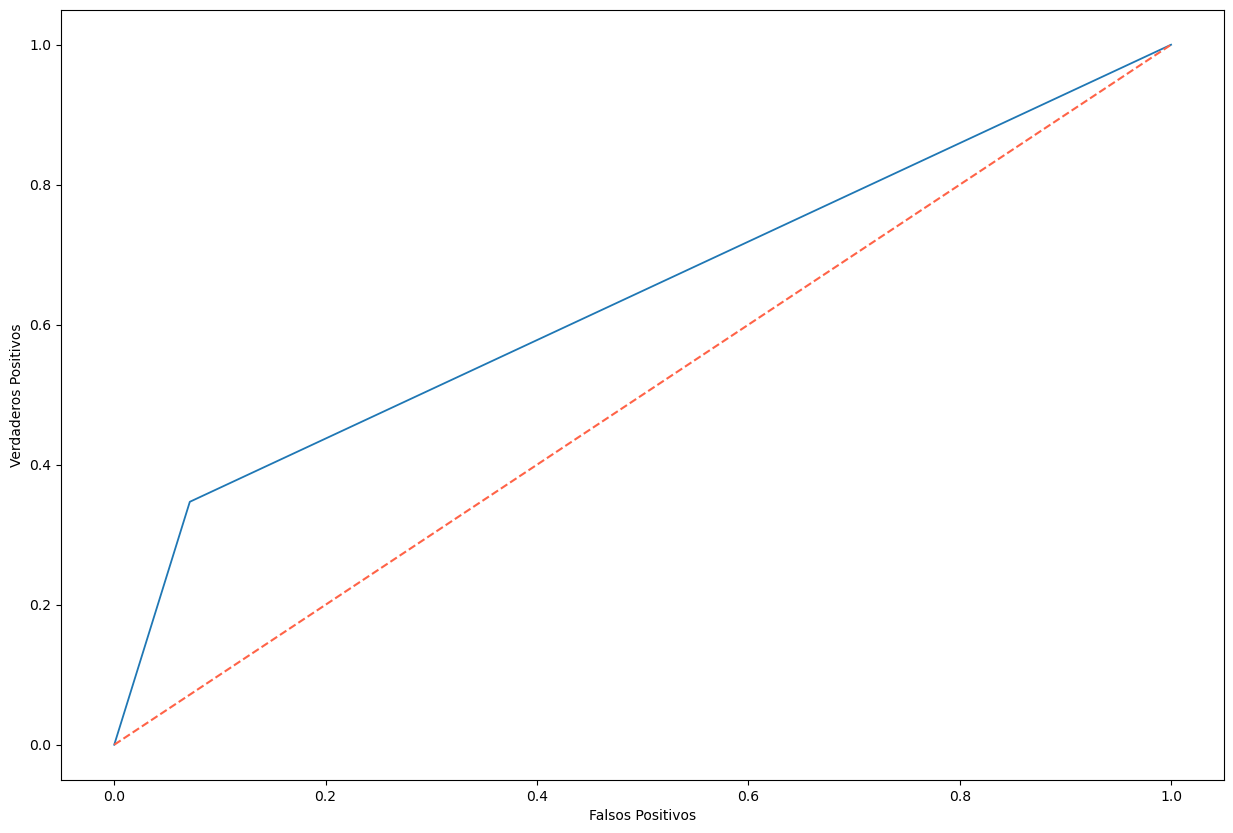

In [94]:
variables = ['age','educational_num','hours_per_week','collars_others','collars_white_collar','workclass_recod_private','workclass_recod_self_employed','workclass_recod_state_level_gov']
reporte_modelo(df_dummies,variables,'income')

In [ ]:
# El F1-score muestra que el modelo predice de mejor manera la predicción de sueldos menores a 50k (valor 0) 
# con 87% mientras que para sueldos mayores a 50k (valor 1) el F1-score es de 44%

# El Precision-score, nos indica que el modelo identifica buena forma el valor 0, con el 81%.

# Recall muestra una gran certeza en predecir sueldos menores a 50k (valor 0) con un porcentaje superior a 90%
# y no es tan efectivo con las etiquetas sobre 50k (35%).

# La curva ROC nos indica que la tasa de detección de verdaderos positivos es superior a la de falsos negativos.

### ** MODELO 2 **

<AxesSubplot:>

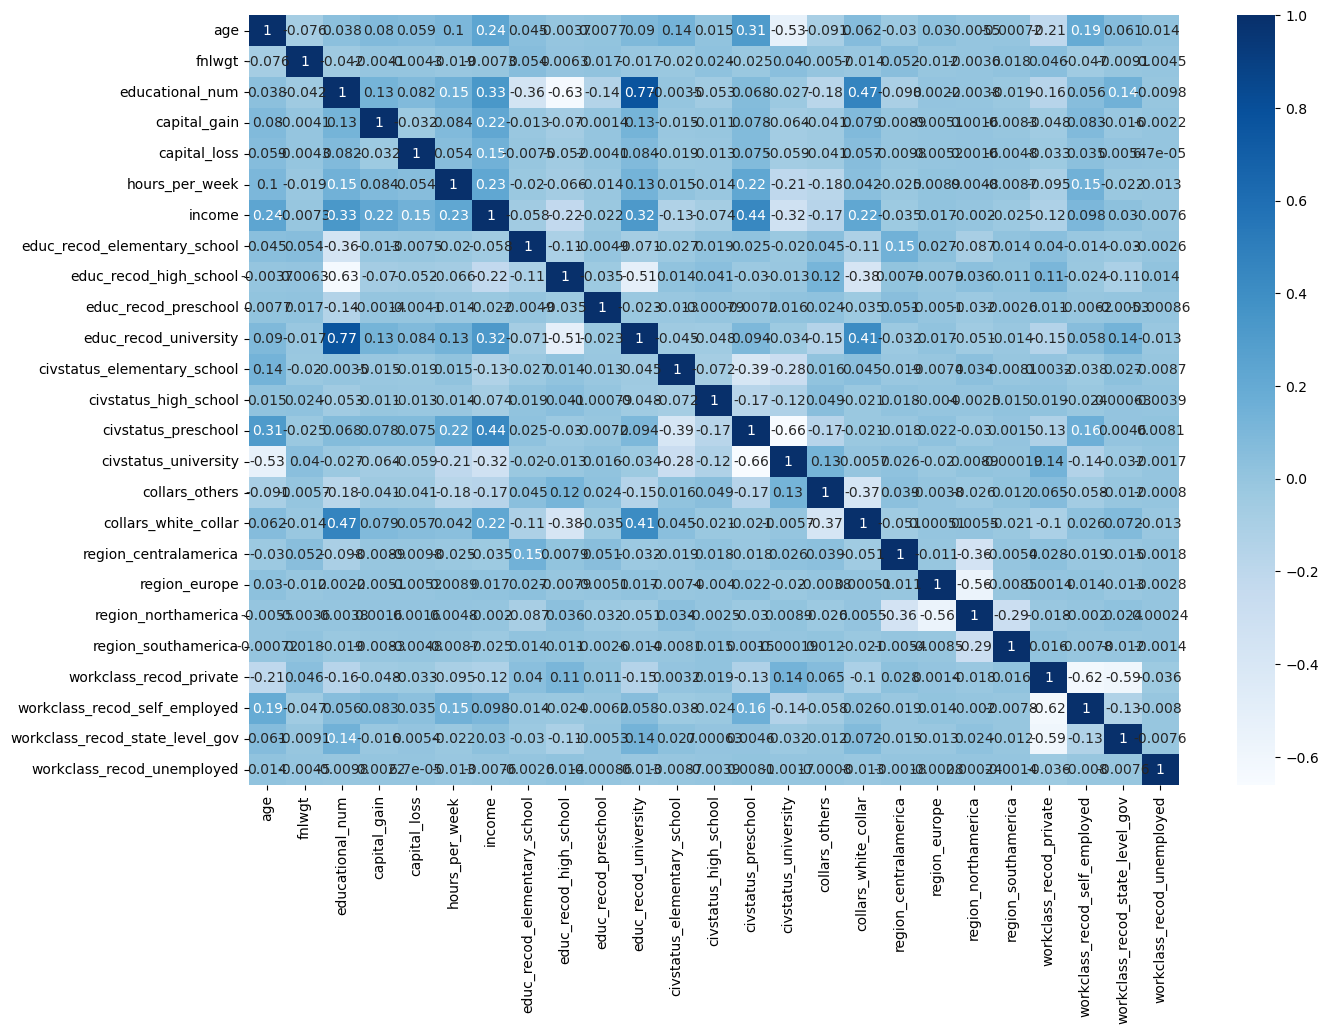

In [358]:
# Observaremos la correlación del DataFrame utilizado en el modelo para verificar las nuevas columnas a utilizar.

sns.heatmap(df_dummies.corr(), cmap="Blues", annot=True)

In [ ]:
# Observamos una relación correlativa entre la variable de trabajo "white_collar" y "educ_university".
# Revisaremos un segundo modelo con estas variables. 

# Nuestro tercer modelo considerará las variables "educational_num" y "other_collars" donde la correlación es 
# negativa.

              precision    recall  f1-score   support

           0       0.83      0.85      0.84     23844
           1       0.51      0.46      0.48      7812

    accuracy                           0.76     31656
   macro avg       0.67      0.66      0.66     31656
weighted avg       0.75      0.76      0.75     31656



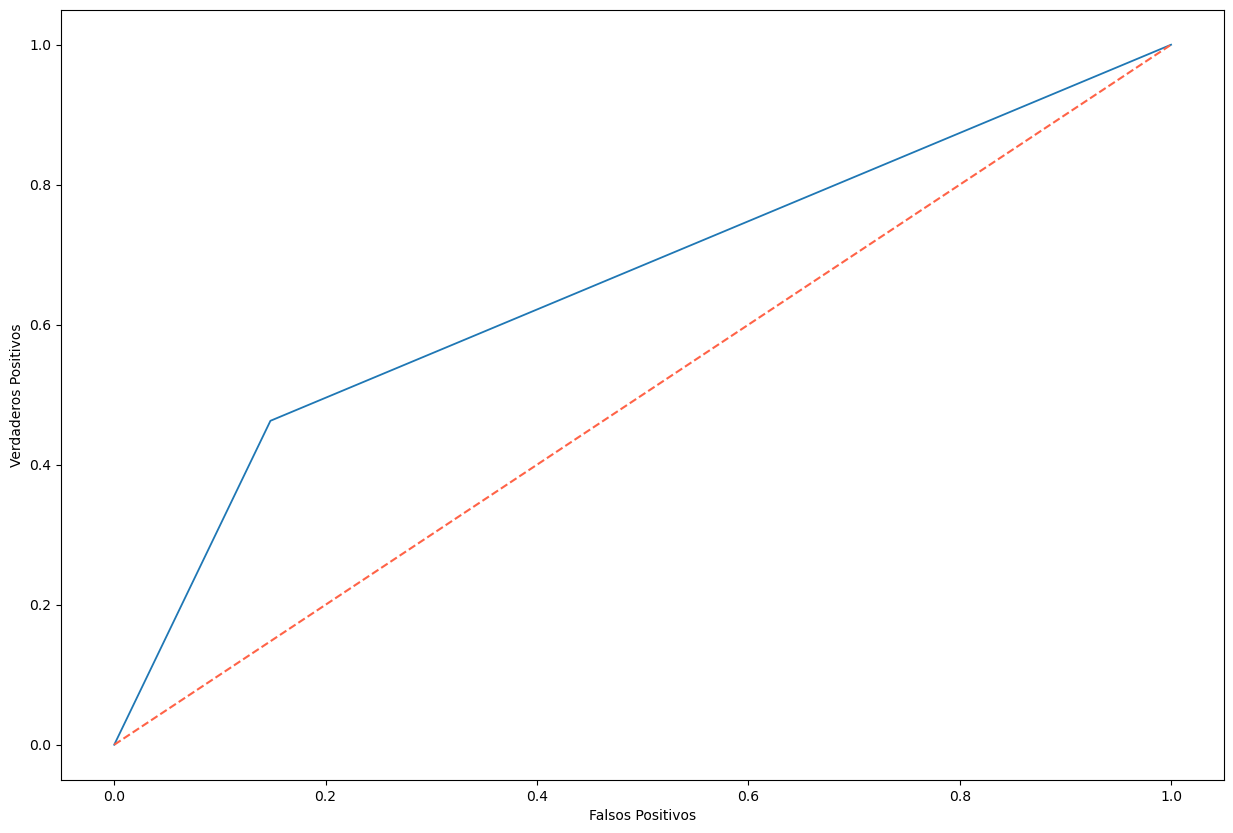

In [95]:
variables = ['educ_recod_university','collars_white_collar']
reporte_modelo(df_dummies, variables, 'income')

### ** MODELO 3 **

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     23844
           1       0.60      0.31      0.41      7812

    accuracy                           0.78     31656
   macro avg       0.70      0.62      0.64     31656
weighted avg       0.76      0.78      0.75     31656



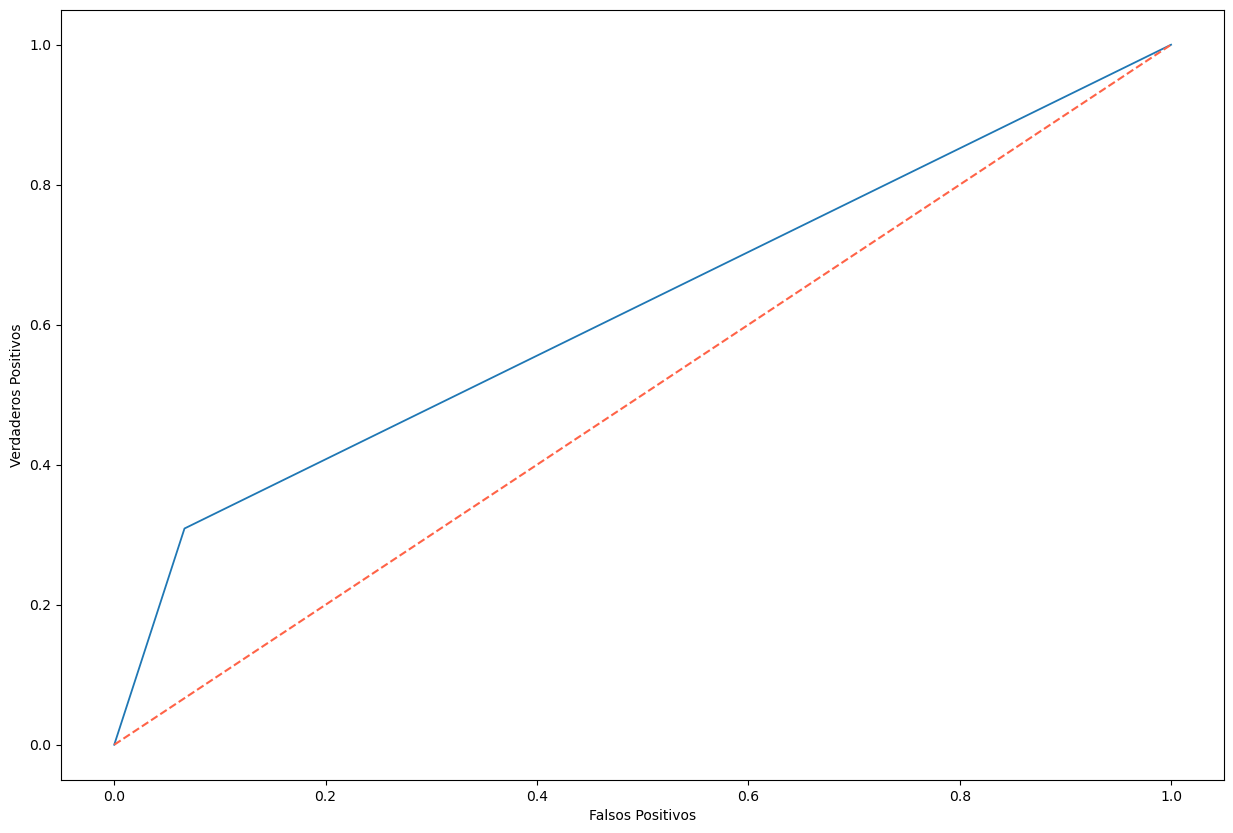

In [96]:
variables = ['age','educational_num','collars_others']
reporte_modelo(df_dummies, variables, 'income')

In [ ]:
# Según lo observado, el modelo 2 fue el que nos dió una curva de ROC (0.5) más efectiva sobre la veracidad del 
# modelo. Dandonos un F1-score de 84% para el 'income' <50k y de 46% para 'income' > 50k.

# El modelo 3 nos muestra una curva mucho más baja que los modelos anteriores (0.3). Aunque su F1-score sea 
# similar al modelo 2.

# El modelo 1, al tener más variables presente podría representar de mejor manera las variables influyentes en la
# la predicción pero me arriesgaría a decir que se podría alcanzar predicciones similares con menos variables.

# Se consideran factores que afectan o determinan el 'income': 'age', 'educational_num', 'collars'